In [1]:
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import sys
sys.path.append('../dependencies/')
import pyemu
from matplotlib.backends.backend_pdf import PdfPages

/Users/mnfienen/Documents/GIT/WDNR_WU/HiCap_Analysis_Tool/examples/../dependencies/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


In [2]:
wkdir = pl.Path('./MASTER/')

### look at the raw PHI historgrams

In [3]:
phi = pd.read_csv(wkdir/ 'prior_mc.phi.actual.csv', index_col = 0).T.iloc[5:]
phi_org = phi.copy()
phi.columns = ['phi']

array([[<Axes: title={'center': 'phi'}>]], dtype=object)

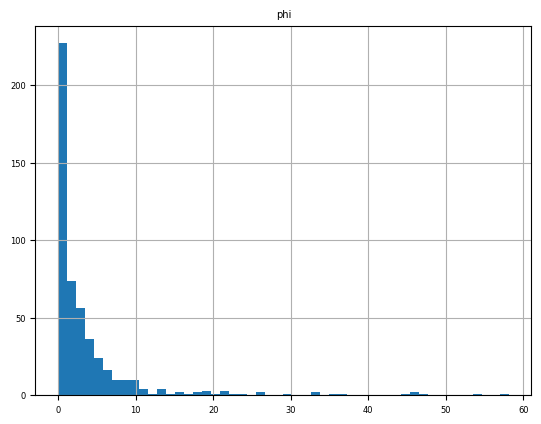

In [4]:
phi.hist(bins=50)

### rejection sampling - knock out high PHI realizations

array([[<Axes: title={'center': 'phi'}>]], dtype=object)

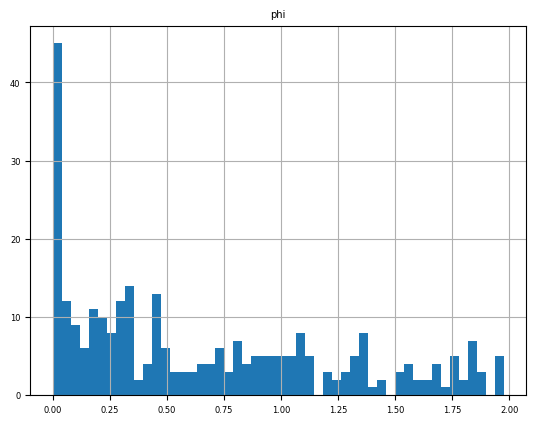

In [19]:
phitoohigh = 2
phi = phi.loc[phi.phi<phitoohigh]
phi.hist(bins=50)

In [20]:
reals_to_keep = phi.index
reject_reals = list(set(phi_org.index)-set(reals_to_keep)) # we want these to be able to look at the outliers
len(reals_to_keep)

289

In [21]:
reject_reals

['412',
 '89',
 '109',
 '43',
 '297',
 '185',
 '403',
 '234',
 '187',
 '184',
 '121',
 '221',
 '319',
 '486',
 '402',
 '358',
 '84',
 '169',
 '222',
 '274',
 '194',
 '275',
 '363',
 '408',
 '426',
 '425',
 '90',
 '414',
 '367',
 '423',
 '31',
 '14',
 '181',
 '430',
 '81',
 '290',
 '38',
 '421',
 '106',
 '493',
 '68',
 '206',
 '153',
 '251',
 '208',
 '211',
 '230',
 '102',
 '479',
 '413',
 '399',
 '366',
 '472',
 '311',
 '316',
 '24',
 '463',
 '28',
 '67',
 '289',
 '99',
 '388',
 '286',
 '118',
 '341',
 '61',
 '497',
 '442',
 '380',
 '469',
 '213',
 '317',
 '461',
 '65',
 '154',
 '23',
 '178',
 '26',
 '175',
 '471',
 '46',
 '163',
 '433',
 '272',
 '330',
 '123',
 '146',
 '59',
 '336',
 '294',
 '162',
 '37',
 '64',
 '344',
 '128',
 '122',
 '190',
 '237',
 '244',
 '476',
 '280',
 '238',
 '296',
 '431',
 '441',
 '78',
 '384',
 '13',
 '374',
 '379',
 '138',
 '34',
 '86',
 '447',
 '320',
 '167',
 '4',
 '88',
 '189',
 '307',
 '98',
 '435',
 '271',
 '436',
 '287',
 '452',
 '207',
 '100',
 '47'

## let's look first at the observations ensemble

In [22]:
obs = pd.read_csv(wkdir / 'prior_mc.0.obs.csv', index_col=0).loc[reals_to_keep] # only keep "good" reals

In [23]:
obs

,tomorrowriver:1013:bdpl,tomorrowriver:1302:bdpl,tomorrowriver:1323:bdpl,tomorrowriver:1860:bdpl,tomorrowriver:23614:bdpl,tomorrowriver:23616:bdpl,tomorrowriver:23620:bdpl,tomorrowriver:23635:bdpl,tomorrowriver:23637:bdpl,tomorrowriver:23647:bdpl,...,tomorrowriver:92743:bdpl,tomorrowriver:92808:bdpl,tomorrowriver:92885:bdpl,tomorrowriver:92981:bdpl,tomorrowriver:93141:bdpl,tomorrowriver:93832:bdpl,tomorrowriver:986:bdpl,tomorrowriver:total_combined:bdpl,tomorrowriver:total_existing:bdpl,tomorrowriver:total_proposed:bdpl
0,0.023084,0.003491,0.000555,0.007634,0.008284,0.049540,0.017802,0.016304,0.014896,0.003542,...,0.012293,0.002936,0.000430,0.005321,0.092270,0.081340,0.024025,3.25720,3.17773,0.081340
1,0.017006,0.001408,0.000142,0.002309,0.006456,0.039201,0.012825,0.007379,0.005494,0.001230,...,0.008544,0.002041,0.000230,0.002231,0.076388,0.041883,0.016566,2.40860,2.36913,0.041883
2,0.021166,0.002738,0.000473,0.006444,0.007635,0.042999,0.015473,0.013560,0.012887,0.003013,...,0.010602,0.002999,0.000463,0.005220,0.093421,0.089005,0.024815,3.10272,3.01626,0.089005
5,0.024929,0.003821,0.000663,0.008757,0.008828,0.052355,0.019942,0.015440,0.016095,0.004242,...,0.008823,0.003379,0.000518,0.005887,0.087958,0.067748,0.027099,3.35754,3.29143,0.067748
6,0.024815,0.003474,0.000700,0.009454,0.008726,0.048557,0.018391,0.017361,0.015851,0.004152,...,0.011268,0.003305,0.000527,0.006666,0.094796,0.083136,0.027336,3.34228,3.26121,0.083136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.024157,0.004690,0.000877,0.010386,0.008958,0.054953,0.019480,0.020888,0.018064,0.004705,...,0.011092,0.002946,0.000570,0.008096,0.115035,0.089551,0.023272,3.53128,3.44337,0.089551
495,0.025569,0.004432,0.000818,0.010295,0.008632,0.056160,0.019694,0.017986,0.018840,0.004782,...,0.010333,0.002879,0.000670,0.007246,0.077528,0.120147,0.023698,3.48166,3.36394,0.120147
496,0.016394,0.000745,0.000060,0.001068,0.005830,0.032074,0.009668,0.005440,0.002870,0.000633,...,0.005912,0.001507,0.000115,0.001234,0.068786,0.045538,0.011478,2.11324,2.07149,0.045538
498,0.018694,0.001690,0.000205,0.003363,0.007107,0.031270,0.014662,0.009823,0.007203,0.001793,...,0.010617,0.002574,0.000228,0.002962,0.072430,0.040406,0.018990,2.57379,2.53542,0.040406


### parse into Time series and Maximum depletion groups

In [24]:
ts_obs = obs[[i for i in obs.columns if not i.endswith(':bdpl')]]
bdpl_obs = obs[[i for i in obs.columns if i.endswith(':bdpl')]]


### plot up the time series

In [25]:
ts_lox = np.unique([i.split('__')[0] for i in ts_obs.columns])

In [26]:
ts_lox

array(['tomorrowriver:70974', 'tomorrowriver:92696'], dtype='<U19')

<Figure size 640x480 with 0 Axes>

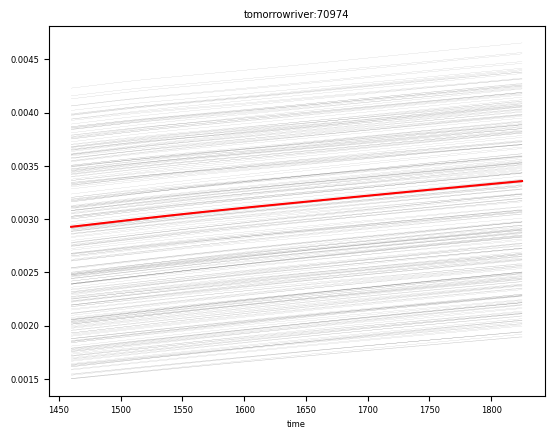

<Figure size 640x480 with 0 Axes>

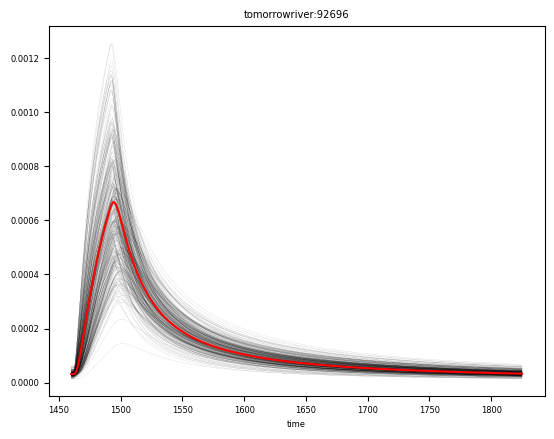

In [27]:
for cts in ts_lox:
    tmp = ts_obs[[i for i in ts_obs.columns if cts in i]].T.copy()
    tmp['time'] = [int(i.split('__')[1]) for i in tmp.index]
    tmp.set_index('time', drop=True, inplace=True)
    plt.figure()
    ax = tmp.plot(alpha=.4, c='k', lw=.1,legend=None)
    tmp['base'].plot(c='r')
    ax.set_title(cts)

### histograms for the max depletion obs

In [14]:
bdpl_obs = bdpl_obs.T

In [15]:
with PdfPages('base_dep.pdf') as outpdf:
    numpages = int(np.ceil(len(bdpl_obs)/9))
    for i in range(numpages):
        bdpl_obs.loc[bdpl_obs.index[i*9:(i+1)*9]].T.hist(figsize=(8,8))
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')

### now let's check out the parameters

In [16]:
pars = pd.read_csv(wkdir / 'prior_mc.0.par.csv', index_col=0)
pars_keep = pars.loc[reals_to_keep].T
pars_reject = pars.loc[reject_reals].T

In [17]:
with PdfPages('pars_kept.pdf') as outpdf:
    numpages = int(np.ceil(len(pars_keep)/9))
    for i in range(numpages):
        pars_keep.loc[pars_keep.index[i*9:(i+1)*9]].T.hist(figsize=(8,8))
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')

In [18]:
with PdfPages('pars_reject.pdf') as outpdf:
    numpages = int(np.ceil(len(pars_keep)/9))
    for i in range(numpages):
        pars_reject.loc[pars_reject.index[i*9:(i+1)*9]].T.hist(figsize=(8,8))
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')